
# Deploying our model!

So this notebook will deploy our model and get image predictions for all boroughs in London.

First we need to load the models.

But before that we need to set our environment up correctly.

I want everything to be cached when the terminal closes so we can come back to it.


In [1]:
## CHECKING NOTEBOOK CONFIG
import os
import sys
import json

# Check where notebook config is saved. Check where cache is saved. Check where .jupyter is saved. Check where .ipython is saved.
# workig directory
import os

import jupyter_core.troubleshoot
print(os.getcwd())
os.chdir("/gpfs/gibbs/project/miranda/fwb7/yolov8")
wd = os.getcwd()

# Check where notebook config is saved
import jupyter_core
jupyter_core.paths.jupyter_config_dir()
print(jupyter_core.paths.jupyter_config_dir())
jupyter_core.troubleshoot.get_data()

import sys
print("Kernel running from:", sys.executable)

# Find config file
import os
import json
import jupyter_core
config_path = jupyter_core.paths.jupyter_config_dir()
# is there a config file?
if os.path.exists(config_path):
    # list files in config path
    print("Files in config path:")
    print(os.listdir(config_path))
    # print("Config file found.")
    # # read config file
    # with open(config_path + "/jupyter_notebook_config.json") as json_file:
    #     data = json.load(json_file)
    #     print(data)

# Check where cache is saved
import jupyter_core
jupyter_core.paths.jupyter_runtime_dir()



/gpfs/gibbs/project/miranda/fwb7/yolov8
/gpfs/gibbs/project/miranda/fwb7/yolov8/.jupyter
Kernel running from: /gpfs/gibbs/project/miranda/fwb7/yolov8/envs/myenv3.10_01/bin/python
Files in config path:
['migrated', 'share', 'jupyter_notebook_config.py']


'/gpfs/gibbs/project/miranda/fwb7/yolov8/envs/myenv3.10_01/share/jupyter/runtime'

In [2]:
## CODE TO RESTORE EVERYTHING AT THE BEGINNING OF THE SESSION

import dill
import os

# set wd to the directory where the notebook is
os.chdir("/gpfs/gibbs/project/miranda/fwb7/yolov8")
wd = os.getcwd()

filename = 'jupyter/my_variables.dill'

# Check if the save file exists
if os.path.exists(filename):
    try:
        with open(filename, 'rb') as f:
            loaded_variables = dill.load(f)

        # Update the current scope with loaded variables
        globals().update(loaded_variables)

        print(f"Variables loaded from {filename}")
    except EOFError:
        print(f"Error: The file {filename} is empty or corrupted.")
else:
    print(f"No saved variables file found at {filename}")


Error: The file jupyter/my_variables.dill is empty or corrupted.


In [4]:
from ultralytics import YOLO
import os
from roboflow import Roboflow
from IPython.display import display
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import os
import supervision as sv
import papermill
import json


# Retrieve metrics of the models

In [3]:
data_b1_dir = "/gpfs/gibbs/project/miranda/fwb7/yolov8/data/data.yaml"

In [5]:

# import os
# from roboflow import Roboflow
# import yaml


# rf = Roboflow(api_key='CBfyNcr7kbpR77E7GwFx')

# project = rf.workspace('fbridgeman').project('grey-to-green')

# # Get working directory
# current_dir = os.getcwd()
# print(f"Current working directory: {current_dir}")

# # ask if the user wants to deploy the model with yes or y
# user_input = input("Do you want to download the dataset inside this current working directory? (yes/y): ").strip().lower()
# if user_input not in ['yes', 'y']:
#     print("Deployment aborted.")
#     exit()
# else:
#     print("Proceeding with download...")

# user_input2 = input("What do you want the data directory to be called? ").strip().lower()
# version_name = input("What version number do you want to deploy? ").strip().lower()


# data_location = os.path.join(current_dir, user_input2)
# # data_location = os.path.join(current_dir, 'data')
# # print(f"Data location: {data_location}")

# # Ensure the data directory exists
# if not os.path.exists(data_location):
#     os.makedirs(data_location)
#     print(f"Created data directory at: {data_location}")
# else:
#     print(f"Data directory already exists at: {data_location}")

# # Download the dataset
# dataset = project.version(version_name).download(model_format='yolov8', location = data_location,
#                                                  overwrite = True)# , location=data_location
# project.version(1).download
# # with open(f"{dataset.location}/data.yaml", 'r') as f:
# #     dataset_yaml = yaml.safe_load(f)
# # dataset_yaml["train"] = "../train/images"
# # dataset_yaml["val"] = "../valid/images"
# # dataset_yaml["test"] = "../test/images"
# # with open(f"{dataset.location}/data.yaml", 'w') as f:
# #     yaml.dump(dataset_yaml, f)


# # Check the location of the data directory
# print(f"Dataset downloaded to: {dataset.location}")

# # Check the contents of the data directory
# data_contents = os.listdir(dataset.location)
# print(f"Data directory contents: {data_contents}")




In [6]:
# Set data directories
v1_data_dir = os.path.join(wd, "data")
v1_data_yaml = os.path.join(v1_data_dir, "data.yaml")
v2_data_dir = os.path.join(wd, "v2")
v2_data_yaml = os.path.join(v2_data_dir, "data.yaml")
vast = "/vast/palmer/scratch/miranda/fwb7/yolov8"
v3_data_dir = os.path.join(vast, "v3")
v3_data_yaml = os.path.join(v3_data_dir, "data.yaml")
v4_data_dir = os.path.join(vast, "v4")
v4_data_yaml = os.path.join(v4_data_dir, "data.yaml")
data_dirs = [v1_data_dir, v2_data_dir, v3_data_dir, v4_data_dir]
data_yamls = [v1_data_yaml, v2_data_yaml, v3_data_yaml, v4_data_yaml]

In [7]:
# Get list of classes by going through yamls
# insert into pandas df
import pandas as pd
import yaml

# names:
# - moving-bicycle
# - moving-bus
# - moving-car
# - moving-heavy-truck
# - moving-light-truck
# - moving-motorcycle
# - stationary-bicycle-offstreet
# - stationary-bicycle-onstreet
# - stationary-car-offstreet
# - stationary-car-onstreet
# - stationary-heavy-truck-offstreet
# - stationary-heavy-truck-onstreet
# - stationary-light-truck-offstreet
# - stationary-light-truck-onstreet
# - stationary-motorcycle-offstreet
# - stationary-motorcycle-onstreet
# - x_other
# nc: 17
# roboflow:
#   license: Private
#   project: grey-to-green
#   url: https://app.roboflow.com/fbridgeman/grey-to-green/1
#   version: 1
#   workspace: fbridgeman
# test: ../test/images
# train: ../train/images
# val: ../valid/images

# Get list of classes by going through yamls
# insert into pandas df
import pandas as pd
classes_dict = {}
# dict needs version and classes
for data_yaml in data_yamls:
    # version is either v1, v2, v3, or v4. Extract from name of data_yaml obj
    version = data_yaml.split("/")[-2]
    with open(data_yaml, 'r') as f:
        data = yaml.safe_load(f)
    classes_dict[version] = data["names"]

print(classes_dict)

{'data': ['moving-bicycle', 'moving-bus', 'moving-car', 'moving-heavy-truck', 'moving-light-truck', 'moving-motorcycle', 'stationary-bicycle-offstreet', 'stationary-bicycle-onstreet', 'stationary-car-offstreet', 'stationary-car-onstreet', 'stationary-heavy-truck-offstreet', 'stationary-heavy-truck-onstreet', 'stationary-light-truck-offstreet', 'stationary-light-truck-onstreet', 'stationary-motorcycle-offstreet', 'stationary-motorcycle-onstreet', 'x_other'], 'v2': ['moving-bicycle', 'moving-bus', 'moving-car', 'moving-heavy-truck', 'moving-light-truck', 'moving-motorcycle', 'stationary-bicycle-offstreet', 'stationary-bicycle-onstreet', 'stationary-bus-onstreet', 'stationary-car-offstreet', 'stationary-car-onstreet', 'stationary-heavy-truck-offstreet', 'stationary-heavy-truck-onstreet', 'stationary-light-truck-offstreet', 'stationary-light-truck-onstreet', 'stationary-motorcycle-offstreet', 'stationary-motorcycle-onstreet', 'x_other'], 'v3': ['moving-car', 'moving-heavy-truck', 'moving-l

In [5]:
from ultralytics import YOLO
import pandas as pd
import os
wd = os.getcwd()

# Load models
models = {}
models_df = pd.DataFrame(columns=["name", "dir", "model", "dataset_version", "batches", "weights", "argfile", "epochs"])
models_dir = {}
models_weights = {}
# models_dir[0] = "/beta1/yolo11x_test1"
# models_dir[1] = "/beta2/v2_data_yolo11x"
# models_dir[2] = "/beta3/v3_data_yolo11x"
# models_dir[3] = "/beta4/v4_yolo11x"

models_dir = {
    1: "/beta1/yolo11x_test1",
    2: "/beta2/v2_data_yolo11x",
    3: "/beta3/v3_data_yolo11x",
    4: "/beta4/v4_yolo11x"
}

for i in range(1,5):
    print(wd)
    print(models_dir[i])
    path = f"{wd}{models_dir[i]}/weights/best.pt"
    print(path)
    models_weights[i] = path
    print(models_weights[i])
    print("Loading model...")
    print(models_weights[i])
    models[i] = YOLO(models_weights[i])
    


/gpfs/gibbs/project/miranda/fwb7/yolov8
/beta1/yolo11x_test1
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta1/yolo11x_test1/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta1/yolo11x_test1/weights/best.pt
Loading model...
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta1/yolo11x_test1/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8
/beta2/v2_data_yolo11x
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta2/v2_data_yolo11x/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta2/v2_data_yolo11x/weights/best.pt
Loading model...
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta2/v2_data_yolo11x/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8
/beta3/v3_data_yolo11x
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta3/v3_data_yolo11x/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta3/v3_data_yolo11x/weights/best.pt
Loading model...
/gpfs/gibbs/project/miranda/fwb7/yolov8/beta3/v3_data_yolo11x/weights/best.pt
/gpfs/gibbs/project/miranda/fwb7/yolov8
/beta4/v4_yolo11x
/gpfs/gi

# RETRIEVING GRAPHS AND CHOOSING CONFIDENCE THRESHOLD FOR EACH MODEL

We're going to display the F-1 curve, (F-1 curve.png), P_curve.png, PR_curve.png, and R_curve.png for each model ipython display

/gpfs/gibbs/project/miranda/fwb7/yolov8


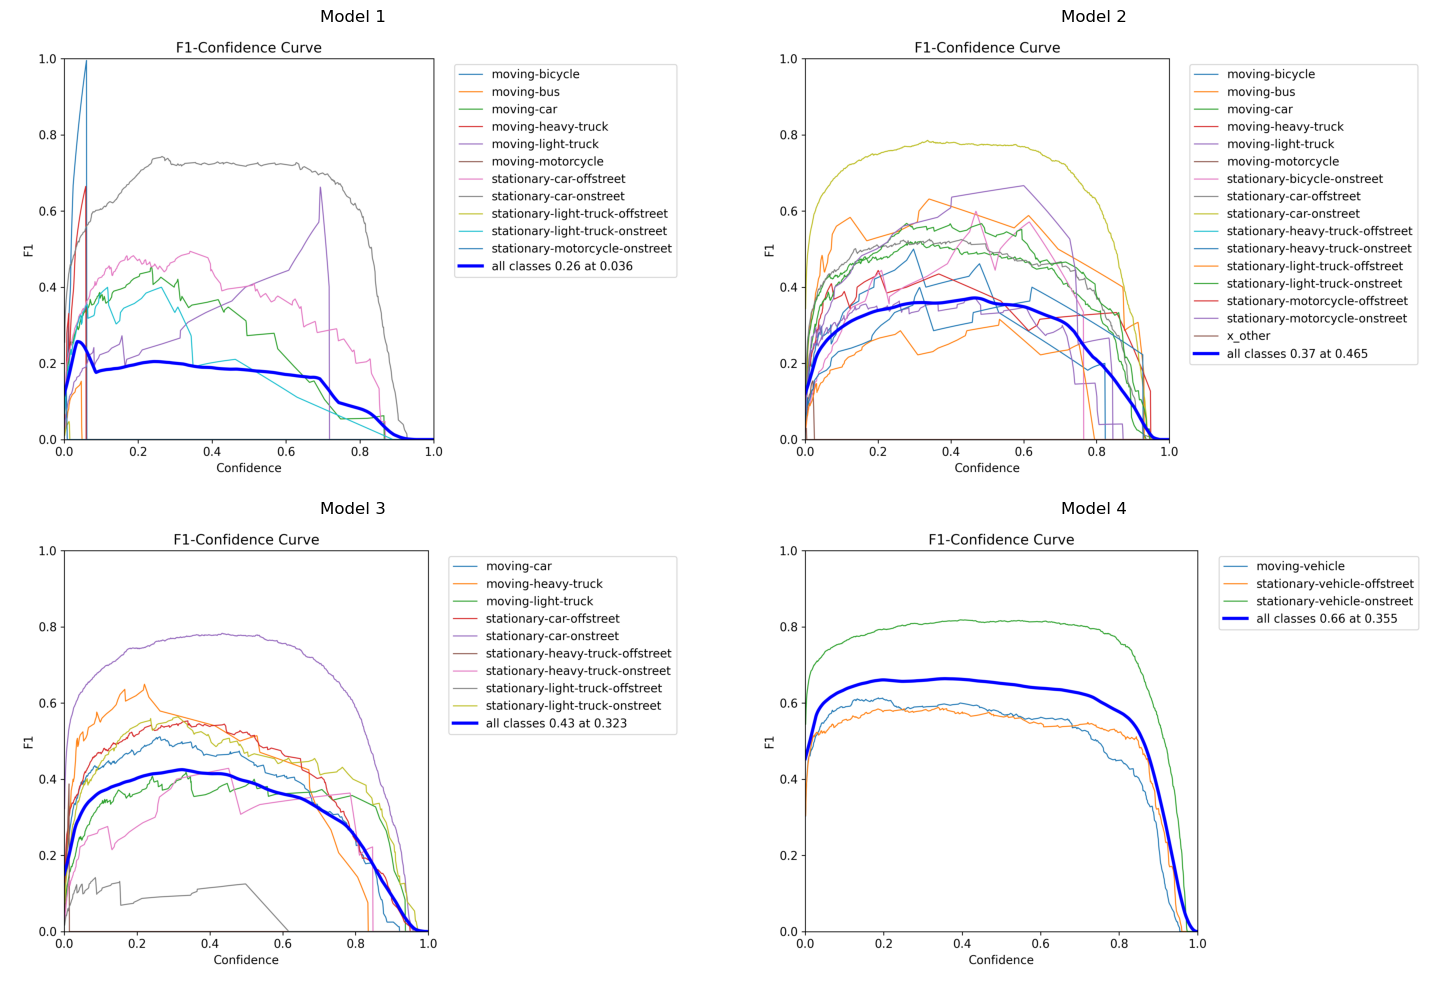

In [9]:
from IPython.display import Image, display
import os
print(wd)

# Define the list of curve image filenames
curve_images = ["F1_curve.png", "P_curve.png", "PR_curve.png", "R_curve.png"]

# # Loop through each model directory and display the images
# for model_key in range(1,5):
#     this_model_dir = models_dir[model_key]
#     print(f"Displaying curves for model {model_key} in directory {this_model_dir}")
#     for curve_image in curve_images:
#         image_path = f"{wd}{this_model_dir}/{curve_image}"
#         if os.path.exists(image_path):
#             print(f"Displaying {curve_image} for model {model_key}")
#             display(Image(filename=image_path))
#         else:
#             print(f"Curve image {curve_image} not found in {this_model_dir}")

import matplotlib.pyplot as plt
# arramge the 4 pngs left to right for each item with a title
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Titles for each subplot
titles = ["Model 1", "Model 2", "Model 3", "Model 4"]

# Loop through each model and plot the F1_curve.png
for i, ax in enumerate(axs.flat, start=1):
    image_path = f"{wd}{models_dir[i]}/F1_curve.png"
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        ax.imshow(img)
        ax.set_title(titles[i-1])
        ax.axis('off')
    else:
        ax.set_title(f"{titles[i-1]} - F1_curve.png not found")
        ax.axis('off')

# Save the grid as a new png
plt.tight_layout()
plt.savefig(f"{wd}/model_comparison_grid.png")
plt.show()

In [6]:
optimised_model_dir = "/home/fwb7/project/yolov8/runs/detect/v4_tune_A_RAY_TUNE_2"
# uses v4 data
optimised_data_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/v4"
optimised_data_yaml = "/vast/palmer/scratch/miranda/fwb7/yolov8/v4/data.yaml"
optimised_weights = "/home/fwb7/project/yolov8/runs/detect/v4_tune_A_RAY_TUNE_2/weights/best.pt"
optimised_model = YOLO(optimised_weights)

# Load the optimised model
optimised_model = YOLO(optimised_weights)

# Set a different directory for saving the results
results_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/runs/detect/val_results"

# Ensure the results directory exists
if not os.path.exists(results_dir):
	os.makedirs(results_dir)

# results_v1 = models[1].val(project=f"{results_dir}/val_v1")
# results_v2 = models[2].val(project=f"{results_dir}/val_v2")
# results_v3 = models[3].val(project=f"{results_dir}/val_v3")
# results_v4 = models[4].val(project=f"{results_dir}/val_v4")
#results_optimised = optimised_model.val(project=f"{results_dir}/val_optimised_v4")

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[28], line 1
----> 1 results_v1.pandas().head()
      3 # Save results to a pandas dataframe
      4 # overall_results_df = pd.DataFrame(columns=["model", "mAP", "F1", "P", "R", "AP", "AP50", "AP75", "AP_small", "AP_medium", "AP_large", "AP_moving", "AP_stationary", "AP_bicycle", "AP_car", "AP_heavy_truck", "AP_light_truck", "AP_motorcycle", "AP_other"])

File /gpfs/gibbs/project/miranda/fwb7/yolov8/envs/myenv3.10_01/lib/python3.10/site-packages/ultralytics/utils/__init__.py:219, in SimpleClass.__getattr__(self, attr)
    217 """Custom attribute access error message with helpful information."""
    218 name = self.__class__.__name__
--> 219 raise AttributeError(f"'{name}' object has no attribute '{attr}'. See valid attributes below.\n{self.__doc__}")

AttributeError: 'DetMetrics' object has no attribute 'pandas'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO

In [11]:
# Retrieve model results
results_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/runs/detect/val_results"
results_v1 = models[1].val(project=f"{results_dir}/val_v1_preds/val")
results_v2 = models[2].val(project=f"{results_dir}/val_v2_preds/val")
results_v3 = models[3].val(project=f"{results_dir}/val_v3_preds/val")
results_v4 = models[4].val(project=f"{results_dir}/val_v4_preds/val")


Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)
YOLO11x summary (fused): 464 layers, 56,846,659 parameters, 0 gradients


val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/data/valid/labels.cache... 61 images, 8 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


                   all         61        257      0.388      0.334      0.371      0.263
        moving-bicycle          1          1          1          0      0.995      0.895
            moving-bus          1          1          0          0     0.0905    0.00905
            moving-car         16         31      0.241      0.581      0.321      0.166
    moving-heavy-truck          2          2          1          0      0.595      0.418
    moving-light-truck          4          4       0.12          1      0.481       0.39
     moving-motorcycle          1          1          0          0          0          0
stationary-car-offstreet         14         41      0.243      0.805      0.425        0.2
stationary-car-onstreet         40        150      0.426      0.847       0.77      0.549
stationary-light-truck-offstreet          1          1          0          0     0.0249     0.0121
stationary-light-truck-onstreet         12         16      0.236      0.438      0.301      0.214

val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/v2/valid/labels.cache... 297 images, 36 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]


                   all        297       1207      0.635       0.32      0.353       0.22
        moving-bicycle          8          9      0.604      0.333      0.409      0.162
            moving-bus          8         11      0.733      0.502      0.565      0.467
            moving-car         81        158      0.598      0.411       0.47      0.304
    moving-heavy-truck         15         15      0.598        0.3      0.378      0.245
    moving-light-truck         32         46       0.46      0.304      0.303      0.199
     moving-motorcycle          3          3          0          0     0.0628     0.0322
stationary-bicycle-onstreet          5          5      0.504        0.6      0.578      0.241
stationary-car-offstreet         64        157      0.669       0.42      0.523      0.313
stationary-car-onstreet        185        688       0.82      0.736      0.832      0.598
stationary-heavy-truck-offstreet          1          1          1          0          0          0
sta

val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v3/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]


                   all        297       1168      0.594      0.396      0.432      0.286
            moving-car         81        158      0.551      0.443      0.444      0.277
    moving-heavy-truck         21         26      0.914      0.411      0.608      0.426
    moving-light-truck         32         46      0.402      0.391      0.408      0.274
stationary-car-offstreet         64        157      0.648       0.47      0.531      0.306
stationary-car-onstreet        185        688      0.741      0.805      0.815      0.579
stationary-heavy-truck-offstreet          1          1          1          0      0.249      0.127
stationary-heavy-truck-onstreet          6          8       0.43      0.375      0.305      0.218
stationary-light-truck-offstreet         13         13      0.119     0.0769     0.0607     0.0419
stationary-light-truck-onstreet         55         71      0.537      0.592      0.467      0.323
Speed: 0.1ms preprocess, 5.6ms inference, 0.0ms loss, 0.7ms postproce

val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.33it/s]


                   all        297       1168      0.692      0.643      0.685      0.457
        moving-vehicle         94        230       0.69      0.522      0.603      0.379
stationary-vehicle-offstreet         69        171      0.594      0.566      0.603      0.366
stationary-vehicle-onstreet        194        767      0.791      0.842      0.848      0.625
Speed: 0.1ms preprocess, 6.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/detect/val_results/val_v4_preds/val/val7


In [12]:

results_optimised = optimised_model.val(project=f"{results_dir}/val_optimised_preds/val")

Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.89it/s]


                   all        297       1168      0.682      0.531      0.601      0.331
        moving-vehicle         94        230      0.713      0.378      0.532      0.292
stationary-vehicle-offstreet         69        171      0.606      0.431      0.467      0.246
stationary-vehicle-onstreet        194        767      0.727      0.784      0.803      0.454
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/detect/val_results/val_optimised_preds/val/val6


In [9]:

# Validate V1, V2, V4, and V4_optimised with IOU 0.7 and 3 Conf thresholds
results_dir2 = "/vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate"
v1_results_dir = f"{results_dir2}/v1"
v2_results_dir = f"{results_dir2}/v2"
v3_results_dir = f"{results_dir2}/v3"
v4_results_dir = f"{results_dir2}/v4"
optimised_results_dir = f"{results_dir2}/v4_optimised"
# make dirs
if not os.path.exists(v1_results_dir):
    os.makedirs(v1_results_dir)
if not os.path.exists(v2_results_dir):
    os.makedirs(v2_results_dir)
if not os.path.exists(v3_results_dir):
    os.makedirs(v3_results_dir)
if not os.path.exists(v4_results_dir):
    os.makedirs(v4_results_dir)
if not os.path.exists(optimised_results_dir):
    os.makedirs(optimised_results_dir)


In [10]:

# Conf - ALL (don't set confidence)
results_v1_conf_all = models[1].val(project=v1_results_dir, name="V1_IOU_07_CONF_ALL", iou=0.7, plots=True)
results_v2_conf_all = models[2].val(project=v2_results_dir, name="V2_IOU_07_CONF_ALL", iou=0.7, plots=True)
results_v4_conf_all = models[4].val(project=v4_results_dir, name="V4_IOU_07_CONF_ALL", iou=0.7, plots=True)
results_opt_conf_all = optimised_model.val(project=optimised_results_dir, name="V4_OPT_IOU_07_CONF_ALL", iou=0.7, plots=True)

# Conf 0.75
results_v1_conf_75 = models[1].val(project=v1_results_dir, name="V1_IOU_07_CONF_75", iou=0.7, conf=0.75)
results_v2_conf_75 = models[2].val(project=v2_results_dir, name="V2_IOU_07_CONF_75", iou=0.7, conf=0.75)
results_v4_conf_75 = models[4].val(project=v4_results_dir, name="V4_IOU_07_CONF_75", iou=0.7, conf=0.75)
results_opt_conf_75 = optimised_model.val(project=optimised_results_dir, name="V4_OPT_IOU_07_CONF_75", iou=0.7, conf=0.75)

# Conf 0.85
results_v1_conf_85 = models[1].val(project=v1_results_dir, name="V1_IOU_07_CONF_85", iou=0.7, conf=0.85)
results_v2_conf_85 = models[2].val(project=v2_results_dir, name="V2_IOU_07_CONF_85", iou=0.7, conf=0.85)
results_v4_conf_85 = models[4].val(project=v4_results_dir, name="V4_IOU_07_CONF_85", iou=0.7, conf=0.85)
results_opt_conf_85 = optimised_model.val(project=optimised_results_dir, name="V4_OPT_IOU_07_CONF_85", iou=0.7, conf=0.85)


Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/data/valid/labels.cache... 61 images, 8 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


                   all         61        257      0.388      0.334      0.371      0.263
        moving-bicycle          1          1          1          0      0.995      0.895
            moving-bus          1          1          0          0     0.0905    0.00905
            moving-car         16         31      0.241      0.581      0.321      0.166
    moving-heavy-truck          2          2          1          0      0.595      0.418
    moving-light-truck          4          4       0.12          1      0.481       0.39
     moving-motorcycle          1          1          0          0          0          0
stationary-car-offstreet         14         41      0.243      0.805      0.425        0.2
stationary-car-onstreet         40        150      0.426      0.847       0.77      0.549
stationary-light-truck-offstreet          1          1          0          0     0.0249     0.0121
stationary-light-truck-onstreet         12         16      0.236      0.438      0.301      0.214

val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/v2/valid/labels.cache... 297 images, 36 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.60it/s]


                   all        297       1207      0.635       0.32      0.353       0.22
        moving-bicycle          8          9      0.604      0.333      0.409      0.162
            moving-bus          8         11      0.733      0.502      0.565      0.467
            moving-car         81        158      0.598      0.411       0.47      0.304
    moving-heavy-truck         15         15      0.598        0.3      0.378      0.245
    moving-light-truck         32         46       0.46      0.304      0.303      0.199
     moving-motorcycle          3          3          0          0     0.0628     0.0322
stationary-bicycle-onstreet          5          5      0.504        0.6      0.578      0.241
stationary-car-offstreet         64        157      0.669       0.42      0.523      0.313
stationary-car-onstreet        185        688       0.82      0.736      0.832      0.598
stationary-heavy-truck-offstreet          1          1          1          0          0          0
sta

val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.14it/s]


                   all        297       1168      0.692      0.643      0.685      0.457
        moving-vehicle         94        230       0.69      0.522      0.603      0.379
stationary-vehicle-offstreet         69        171      0.594      0.566      0.603      0.366
stationary-vehicle-onstreet        194        767      0.791      0.842      0.848      0.625
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4/V4_IOU_07_CONF_ALL
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)
YOLO11x summary (fused): 464 layers, 56,830,489 parameters, 0 gradients


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]


                   all        297       1168      0.682      0.531      0.601      0.331
        moving-vehicle         94        230      0.713      0.378      0.532      0.292
stationary-vehicle-offstreet         69        171      0.606      0.431      0.467      0.246
stationary-vehicle-onstreet        194        767      0.727      0.784      0.803      0.454
Speed: 0.1ms preprocess, 5.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4_optimised/V4_OPT_IOU_07_CONF_ALL
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/data/valid/labels.cache... 61 images, 8 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]


                   all         61        257       0.15     0.0675      0.111     0.0804
        moving-bicycle          1          1          0          0          0          0
            moving-bus          1          1          0          0          0          0
            moving-car         16         31        0.2     0.0323      0.131     0.0787
    moving-heavy-truck          2          2          0          0          0          0
    moving-light-truck          4          4          0          0          0          0
     moving-motorcycle          1          1          0          0          0          0
stationary-car-offstreet         14         41      0.583      0.171      0.381      0.216
stationary-car-onstreet         40        150      0.871       0.54      0.712       0.59
stationary-light-truck-offstreet          1          1          0          0          0          0
stationary-light-truck-onstreet         12         16          0          0          0          0

val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/v2/valid/labels.cache... 297 images, 36 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]


                   all        297       1207        0.6      0.168      0.382      0.277
        moving-bicycle          8          9        0.5      0.111      0.335      0.235
            moving-bus          8         11       0.75      0.273      0.524      0.471
            moving-car         81        158      0.741      0.253      0.476      0.376
    moving-heavy-truck         15         15          1        0.2        0.6      0.442
    moving-light-truck         32         46        0.5      0.087      0.272      0.224
     moving-motorcycle          3          3          0          0          0          0
stationary-bicycle-onstreet          5          5          1        0.2        0.6       0.36
stationary-car-offstreet         64        157      0.776      0.287      0.541      0.395
stationary-car-onstreet        185        688      0.927      0.535      0.733      0.622
stationary-heavy-truck-offstreet          1          1          0          0          0          0
sta

val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]


                   all        297       1168      0.807      0.499      0.656        0.5
        moving-vehicle         94        230      0.842      0.348      0.595      0.441
stationary-vehicle-offstreet         69        171      0.692      0.433      0.575      0.413
stationary-vehicle-onstreet        194        767      0.889      0.717      0.798      0.647
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4/V4_IOU_07_CONF_75
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]


                   all        297       1168      0.655      0.123      0.388      0.286
        moving-vehicle         94        230          0          0          0          0
stationary-vehicle-offstreet         69        171          1     0.0468      0.523      0.405
stationary-vehicle-onstreet        194        767      0.965      0.322      0.641      0.451
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4_optimised/V4_OPT_IOU_07_CONF_75
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/data/valid/labels.cache... 61 images, 8 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]


                   all         61        257      0.202     0.0296      0.117     0.0867
        moving-bicycle          1          1          0          0          0          0
            moving-bus          1          1          0          0          0          0
            moving-car         16         31        0.5     0.0323      0.276      0.165
    moving-heavy-truck          2          2          0          0          0          0
    moving-light-truck          4          4          0          0          0          0
     moving-motorcycle          1          1          0          0          0          0
stationary-car-offstreet         14         41       0.75     0.0732      0.414      0.251
stationary-car-onstreet         40        150      0.971       0.22      0.598      0.538
stationary-light-truck-offstreet          1          1          0          0          0          0
stationary-light-truck-onstreet         12         16          0          0          0          0

val: Scanning /gpfs/gibbs/project/miranda/fwb7/yolov8/v2/valid/labels.cache... 297 images, 36 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.91it/s]


                   all        297       1207      0.404     0.0935      0.247      0.207
        moving-bicycle          8          9          0          0          0          0
            moving-bus          8         11       0.75      0.273      0.524      0.471
            moving-car         81        158      0.735      0.158      0.431      0.357
    moving-heavy-truck         15         15          1        0.2        0.6      0.442
    moving-light-truck         32         46      0.333     0.0217       0.17      0.153
     moving-motorcycle          3          3          0          0          0          0
stationary-bicycle-onstreet          5          5          0          0          0          0
stationary-car-offstreet         64        157      0.929      0.166      0.546      0.445
stationary-car-onstreet        185        688      0.959      0.342       0.65      0.585
stationary-heavy-truck-offstreet          1          1          0          0          0          0
sta

val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.42it/s]


                   all        297       1168      0.869      0.388      0.625      0.499
        moving-vehicle         94        230      0.881      0.257      0.569      0.443
stationary-vehicle-offstreet         69        171        0.8      0.351      0.577      0.429
stationary-vehicle-onstreet        194        767      0.926      0.555      0.731      0.626
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4/V4_IOU_07_CONF_85
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  9.20it/s]


                   all        297       1168      0.667    0.00238      0.335      0.234
        moving-vehicle         94        230          0          0          0          0
stationary-vehicle-offstreet         69        171          1    0.00585      0.503      0.402
stationary-vehicle-onstreet        194        767          1     0.0013      0.501        0.3
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/runs/validate/v4_optimised/V4_OPT_IOU_07_CONF_85


In [18]:
import pandas as pd

def save_confusion_matrix(results, run_name):
    # Get the confusion matrix and class names
    names = list(results.names.values())
    conf_matrix = results.confusion_matrix.matrix

    # Add "Background" class to names
    if len(names) < conf_matrix.shape[0]:
        names.append("background")  # Ensure alignment with matrix shape

    # Create the DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=names, columns=names)
    conf_matrix_df.index.name = 'Predicted'
    conf_matrix_df.columns.name = 'Actual'

    conf_mat_csv_save_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/confusion_matrices"
    # Save the DataFrame to a CSV file
    conf_matrix_df.to_csv(f"{conf_mat_csv_save_dir}/confusion_matrix_{run_name}.csv", index=True)

    print(f"Confusion matrix saved to confusion_matrix_{run_name}.csv")
    return conf_matrix_df

# true positives and false positives function
#results_v1.confusion_matrix.tp_fp gives array of tp and fp for each class
# function:
def get_tp_fp(results, run_name):
    # Get the confusion matrix
    names = list(results.names.values())
    tp_fp = results.confusion_matrix.tp_fp()
    tp_fp_df = pd.DataFrame(tp_fp, columns=names, index=["TP", "FP"])
    tp_fp_df.index.name = 'Metric'
    tp_fp_df.columns.name = 'Class'
    
    tp_fp_save_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/tp_fp"
    # save as csv with name
    tp_fp_df.to_csv(f"{tp_fp_save_dir}/tp_fp_{run_name}.csv", index=True)
    print(f"TP and FP saved to tp_fp_{run_name}.csv")


    return tp_fp_df

# Class-specific metrics for each group
def save_class_metrics(results, run_name):
    class_metrics = []
    for i, class_id in enumerate(results.ap_class_index):
        metrics = results.class_result(i)
        name = results.names[i]
        class_metrics.append({
            "Class ID": class_id,
            "Class Name": name,
            "Precision": metrics[0],
            "Recall": metrics[1],
            "mAP@0.5": metrics[2],
            "mAP@0.5:0.95": metrics[3]
        })
        
    class_metrics_save_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics"
    class_metrics_df = pd.DataFrame(class_metrics)
    class_metrics_df.to_csv(f"{class_metrics_save_dir}/class_metrics_{run_name}.csv", index=False)
    print(f"Class-specific metrics saved to {run_name}.csv")
    return class_metrics_df


In [19]:
# For all models save above: save confusion matrix, tp_fp and class metrics
# Save confusion matrix
# v1 conf all
v1_conf_all_cm = save_confusion_matrix(results_v1_conf_all, "V1_IOU_07_CONF_ALL")
v1_conf_all_tpfp = get_tp_fp(results_v1_conf_all, "V1_IOU_07_CONF_ALL")
v1_conf_all_class_metrics = save_class_metrics(results_v1_conf_all, "V1_IOU_07_CONF_ALL")

# v2 conf all
v2_conf_all_cm = save_confusion_matrix(results_v2_conf_all, "V2_IOU_07_CONF_ALL")
v2_conf_all_tpfp = get_tp_fp(results_v2_conf_all, "V2_IOU_07_CONF_ALL")
v2_conf_all_class_metrics = save_class_metrics(results_v2_conf_all, "V2_IOU_07_CONF_ALL")

# v4 conf all
v4_conf_all_cm = save_confusion_matrix(results_v4_conf_all, "V4_IOU_07_CONF_ALL")
v4_conf_all_tpfp = get_tp_fp(results_v4_conf_all, "V4_IOU_07_CONF_ALL")
v4_conf_all_class_metrics = save_class_metrics(results_v4_conf_all, "V4_IOU_07_CONF_ALL")

# v4 opt conf all
v4_opt_conf_all_cm = save_confusion_matrix(results_opt_conf_all, "V4_OPT_IOU_07_CONF_ALL")
v4_opt_conf_all_tpfp = get_tp_fp(results_opt_conf_all, "V4_OPT_IOU_07_CONF_ALL")
v4_opt_conf_all_class_metrics = save_class_metrics(results_opt_conf_all, "V4_OPT_IOU_07_CONF_ALL")

# v1 conf 075
v1_conf_75_cm = save_confusion_matrix(results_v1_conf_75, "V1_IOU_07_CONF_75")
v1_conf_75_tpfp = get_tp_fp(results_v1_conf_75, "V1_IOU_07_CONF_75")
v1_conf_75_class_metrics = save_class_metrics(results_v1_conf_75, "V1_IOU_07_CONF_75")

# v2 conf 075
v2_conf_75_cm = save_confusion_matrix(results_v2_conf_75, "V2_IOU_07_CONF_75")
v2_conf_75_tpfp = get_tp_fp(results_v2_conf_75, "V2_IOU_07_CONF_75")
v2_conf_75_class_metrics = save_class_metrics(results_v2_conf_75, "V2_IOU_07_CONF_75")

# v4 conf 075
v4_conf_75_cm = save_confusion_matrix(results_v4_conf_75, "V4_IOU_07_CONF_75")
v4_conf_75_tpfp = get_tp_fp(results_v4_conf_75, "V4_IOU_07_CONF_75")
v4_conf_75_class_metrics = save_class_metrics(results_v4_conf_75, "V4_IOU_07_CONF_75")

# v4 opt conf 075
v4_opt_conf_75_cm = save_confusion_matrix(results_opt_conf_75, "V4_OPT_IOU_07_CONF_75")
v4_opt_conf_75_tpfp = get_tp_fp(results_opt_conf_75, "V4_OPT_IOU_07_CONF_75")
v4_opt_conf_75_class_metrics = save_class_metrics(results_opt_conf_75, "V4_OPT_IOU_07_CONF_75")

# v1 conf 085
v1_conf_85_cm = save_confusion_matrix(results_v1_conf_85, "V1_IOU_07_CONF_85")
v1_conf_85_tpfp = get_tp_fp(results_v1_conf_85, "V1_IOU_07_CONF_85")
v1_conf_85_class_metrics = save_class_metrics(results_v1_conf_85, "V1_IOU_07_CONF_85")

# v2 conf 085
v2_conf_85_cm = save_confusion_matrix(results_v2_conf_85, "V2_IOU_07_CONF_85")
v2_conf_85_tpfp = get_tp_fp(results_v2_conf_85, "V2_IOU_07_CONF_85")
v2_conf_85_class_metrics = save_class_metrics(results_v2_conf_85, "V2_IOU_07_CONF_85")

# v4 conf 085
v4_conf_85_cm = save_confusion_matrix(results_v4_conf_85, "V4_IOU_07_CONF_85")
v4_conf_85_tpfp = get_tp_fp(results_v4_conf_85, "V4_IOU_07_CONF_85")
v4_conf_85_class_metrics = save_class_metrics(results_v4_conf_85, "V4_IOU_07_CONF_85")

# v4 opt conf 085
v4_opt_conf_85_cm = save_confusion_matrix(results_opt_conf_85, "V4_OPT_IOU_07_CONF_85")
v4_opt_conf_85_tpfp = get_tp_fp(results_opt_conf_85, "V4_OPT_IOU_07_CONF_85")
v4_opt_conf_85_class_metrics = save_class_metrics(results_opt_conf_85, "V4_OPT_IOU_07_CONF_85")


Confusion matrix saved to confusion_matrix_V1_IOU_07_CONF_ALL.csv
TP and FP saved to tp_fp_V1_IOU_07_CONF_ALL.csv
Class-specific metrics saved to V1_IOU_07_CONF_ALL.csv
Confusion matrix saved to confusion_matrix_V2_IOU_07_CONF_ALL.csv
TP and FP saved to tp_fp_V2_IOU_07_CONF_ALL.csv
Class-specific metrics saved to V2_IOU_07_CONF_ALL.csv
Confusion matrix saved to confusion_matrix_V4_IOU_07_CONF_ALL.csv
TP and FP saved to tp_fp_V4_IOU_07_CONF_ALL.csv
Class-specific metrics saved to V4_IOU_07_CONF_ALL.csv
Confusion matrix saved to confusion_matrix_V4_OPT_IOU_07_CONF_ALL.csv
TP and FP saved to tp_fp_V4_OPT_IOU_07_CONF_ALL.csv
Class-specific metrics saved to V4_OPT_IOU_07_CONF_ALL.csv
Confusion matrix saved to confusion_matrix_V1_IOU_07_CONF_75.csv
TP and FP saved to tp_fp_V1_IOU_07_CONF_75.csv
Class-specific metrics saved to V1_IOU_07_CONF_75.csv
Confusion matrix saved to confusion_matrix_V2_IOU_07_CONF_75.csv
TP and FP saved to tp_fp_V2_IOU_07_CONF_75.csv
Class-specific metrics saved to V2

In [24]:
#save confidence map75 at conf75
import numpy as np
results_v1_conf_all.maps
v1_map75 = results_v1_conf_all.maps
print(v1_map75)

[     0.8955   0.0090455     0.16559     0.41832     0.38968           0      0.2632      0.2632     0.20039     0.54893      0.2632      0.2632    0.012082     0.21364      0.2632    0.042063      0.2632]


In [13]:
import pandas as pd

# Convert results dictionary to DataFrame
results_dict = results_v1.results_dict
results_v1_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Value'])

# View the DataFrame
print(results_v1_df)

results_dict = results_v2.results_dict
results_v2_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Value'])

# View the DataFrame
print(results_v2_df)

results_dict = results_v3.results_dict
results_v3_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Value'])

# View the DataFrame
print(results_v3_df)

results_dict = results_v4.results_dict
results_v4_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Value'])

# View the DataFrame
print(results_v4_df)

results_dict = results_optimised.results_dict
results_optimised_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Value'])

# View the DataFrame
print(results_optimised_df)



                         Value
metrics/precision(B)  0.387783
metrics/recall(B)     0.333608
metrics/mAP50(B)      0.370922
metrics/mAP50-95(B)   0.263204
fitness               0.273976
                         Value
metrics/precision(B)  0.634960
metrics/recall(B)     0.320014
metrics/mAP50(B)      0.352757
metrics/mAP50-95(B)   0.220400
fitness               0.233636
                         Value
metrics/precision(B)  0.593581
metrics/recall(B)     0.395962
metrics/mAP50(B)      0.432105
metrics/mAP50-95(B)   0.285899
fitness               0.300520
                         Value
metrics/precision(B)  0.691608
metrics/recall(B)     0.643232
metrics/mAP50(B)      0.684839
metrics/mAP50-95(B)   0.456580
fitness               0.479406
                         Value
metrics/precision(B)  0.682039
metrics/recall(B)     0.530988
metrics/mAP50(B)      0.600915
metrics/mAP50-95(B)   0.330806
fitness               0.357817


In [14]:
# Class specific results
results_v1.class_result
results_v1.names


{0: 'moving-bicycle',
 1: 'moving-bus',
 2: 'moving-car',
 3: 'moving-heavy-truck',
 4: 'moving-light-truck',
 5: 'moving-motorcycle',
 6: 'stationary-bicycle-offstreet',
 7: 'stationary-bicycle-onstreet',
 8: 'stationary-car-offstreet',
 9: 'stationary-car-onstreet',
 10: 'stationary-heavy-truck-offstreet',
 11: 'stationary-heavy-truck-onstreet',
 12: 'stationary-light-truck-offstreet',
 13: 'stationary-light-truck-onstreet',
 14: 'stationary-motorcycle-offstreet',
 15: 'stationary-motorcycle-onstreet',
 16: 'x_other'}

In [15]:
results_v1.names[0]


'moving-bicycle'

In [16]:
import pandas as pd

# Initialize a list to store class metrics
class_metrics = []
results_v1.names[1]
# Iterate over all class indices
for i, class_id in enumerate(results_v1.ap_class_index):
    metrics = results_v1.class_result(i)  # Extract metrics for class `i`
    name = results_v1.names[i]  # Get the class name
    class_metrics.append({
        "Class ID": class_id,
        "Class Name": name,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "mAP@0.5": metrics[2],
        "mAP@0.5:0.95": metrics[3]
    })

# Convert the list of dictionaries to a pandas DataFrame
class_metrics_df = pd.DataFrame(class_metrics)

# Save the DataFrame to a CSV file
class_metrics_df.to_csv("class_metrics_v1.csv", index=False)

print("Class-specific metrics saved to class_metrics_v1.csv")





Class-specific metrics saved to class_metrics_v1.csv


Let's choose a threshold of 0.75

In [17]:
# Validate all models at conf = 0.75 to get v4 confidence thresholds
beta1_dir = "/home/fwb7/project/yolov8/beta1"
beta2_dir = "/home/fwb7/project/yolov8/beta2"
beta3_dir = "/home/fwb7/project/yolov8/beta3"
beta4_dir = "/home/fwb7/project/yolov8/beta4"
# results_v1_conf75 = models[1].val(project=beta1_dir, name = "val_v1_conf_75", conf=0.75)
# results_v2_conf75 = models[2].val(project=beta2_dir, name = "val_v2_conf_75", conf=0.75)
# results_v3_conf75 = models[3].val(project=beta3_dir, name = "val_v3_conf_75", conf=0.75)
# results_v4_conf75 = models[4].val(project=beta4_dir, name = "val_v4_conf_75", conf=0.75)
# results_v4_optimised_conf75 = optimised_model.val(project=beta4_dir, name = "val_v4_optimised_conf_75", conf=0.75)


In [15]:
import pandas as pd

def save_confusion_matrix(results, run_name):
    # Get the confusion matrix and class names
    names = list(results.names.values())
    conf_matrix = results.confusion_matrix.matrix

    # Add "Background" class to names
    if len(names) < conf_matrix.shape[0]:
        names.append("background")  # Ensure alignment with matrix shape

    # Create the DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=names, columns=names)
    conf_matrix_df.index.name = 'Actual'
    conf_matrix_df.columns.name = 'Predicted'

    conf_mat_csv_save_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/confusion_matrices"
    # Save the DataFrame to a CSV file
    conf_matrix_df.to_csv(f"{conf_mat_csv_save_dir}/confusion_matrix_{run_name}.csv", index=True)

    print(f"Confusion matrix saved to confusion_matrix_{run_name}.csv")
    return conf_matrix_df


In [19]:

# Example usage
confusion_matrix_v1_conf75 = save_confusion_matrix(results_v1_conf75, "v1_conf75")
confusion_matrix_v2_conf75 = save_confusion_matrix(results_v2_conf75, "v2_conf75")
confusion_matrix_v3_conf75 = save_confusion_matrix(results_v3_conf75, "v3_conf75")
confusion_matrix_v4_conf75 = save_confusion_matrix(results_v4_conf75, "v4_conf75")
confusion_matrix_v4_optimised_conf75 = save_confusion_matrix(results_v4_optimised_conf75, "v4_optimised_conf75")

NameError: name 'results_v1_conf75' is not defined

In [25]:
results_v4.confusion_matrix.tp_fp()
# results_v1.confusion_matrix.matrix

(array([        120,          99,         654]),
 array([         71,          87,         218]))

In [13]:
# true positives and false positives function
#results_v1.confusion_matrix.tp_fp gives array of tp and fp for each class
# function:
def get_tp_fp(results, run_name):
    # Get the confusion matrix
    names = list(results.names.values())
    tp_fp = results.confusion_matrix.tp_fp()
    tp_fp_df = pd.DataFrame(tp_fp, columns=names, index=["TP", "FP"])
    tp_fp_df.index.name = 'Metric'
    tp_fp_df.columns.name = 'Class'
    
    tp_fp_save_dir = "/vast/palmer/scratch/miranda/fwb7/yolov8/tp_fp"
    # save as csv with name
    tp_fp_df.to_csv(f"{tp_fp_save_dir}/tp_fp_{run_name}.csv", index=True)
    print(f"TP and FP saved to tp_fp_{run_name}.csv")


    return tp_fp_df


In [ ]:

# Example usage for all models
tp_fp_v1 = get_tp_fp(results_v1, "tp_fp_v1")
tp_fp_v2 = get_tp_fp(results_v2, "tp_fp_v2")
tp_fp_v3 = get_tp_fp(results_v3, "tp_fp_v3")
tp_fp_v4 = get_tp_fp(results_v4, "tp_fp_v4")
tp_fp_optimised = get_tp_fp(results_optimised, "tp_fp_optimised")

# Now at conf = 0.75
tp_fp_v1_conf75 = get_tp_fp(results_v1_conf75, "tp_fp_v1_conf75")
tp_fp_v2_conf75 = get_tp_fp(results_v2_conf75, "tp_fp_v2_conf75")
tp_fp_v3_conf75 = get_tp_fp(results_v3_conf75, "tp_fp_v3_conf75")
tp_fp_v4_conf75 = get_tp_fp(results_v4_conf75, "tp_fp_v4_conf75")
tp_fp_optimised_conf75 = get_tp_fp(results_v4_optimised_conf75, "tp_fp_optimised_conf75")



In [ ]:
# Now we need to do it all again:  confusion matrix, tp_fp for conf = 0.5
results_v1_conf50 = models[1].val(project=beta1_dir, name = "val_v1_conf_50", conf=0.5)
results_v2_conf50 = models[2].val(project=beta2_dir, name = "val_v2_conf_50", conf=0.5)
results_v3_conf50 = models[3].val(project=beta3_dir, name = "val_v3_conf_50", conf=0.5)
results_v4_conf50 = models[4].val(project=beta4_dir, name = "val_v4_conf_50", conf=0.5)
results_v4_optimised_conf50 = optimised_model.val(project=beta4_dir, name = "val_v4_optimised_conf_50", conf=0.5)

# Confusion matrix
confusion_matrix_v1_conf50 = save_confusion_matrix(results_v1_conf50, "v1_conf50")
confusion_matrix_v2_conf50 = save_confusion_matrix(results_v2_conf50, "v2_conf50")
confusion_matrix_v3_conf50 = save_confusion_matrix(results_v3_conf50, "v3_conf50")
confusion_matrix_v4_conf50 = save_confusion_matrix(results_v4_conf50, "v4_conf50")
confusion_matrix_v4_optimised_conf50 = save_confusion_matrix(results_v4_optimised_conf50, "v4_optimised_conf50")

# True positives and false positives
tp_fp_v1_conf50 = get_tp_fp(results_v1_conf50, "tp_fp_v1_conf50")
tp_fp_v2_conf50 = get_tp_fp(results_v2_conf50, "tp_fp_v2_conf50")
tp_fp_v3_conf50 = get_tp_fp(results_v3_conf50, "tp_fp_v3_conf50")
tp_fp_v4_conf50 = get_tp_fp(results_v4_conf50, "tp_fp_v4_conf50")
tp_fp_optimised_conf50 = get_tp_fp(results_v4_optimised_conf50, "tp_fp_optimised_conf50")


NameError: name 'models' is not defined

In [19]:

# Validate model v4 with different IOU thresholds and confidence levels
results_v4_conf50_iou40 = models[4].val(project=beta4_dir, name="val_v4_conf_50_iou_40", conf=0.5, iou=0.4)
results_v4_conf50_iou50 = models[4].val(project=beta4_dir, name="val_v4_conf_50_iou_50", conf=0.5, iou=0.5)
results_v4_conf75_iou40 = models[4].val(project=beta4_dir, name="val_v4_conf_75_iou_40", conf=0.75, iou=0.4)
results_v4_conf75_iou50 = models[4].val(project=beta4_dir, name="val_v4_conf_75_iou_50", conf=0.75, iou=0.5)


Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.04it/s]


                   all        297       1168       0.73      0.598      0.676      0.496
        moving-vehicle         94        230      0.724      0.478      0.613      0.433
stationary-vehicle-offstreet         69        171      0.635      0.509      0.586      0.403
stationary-vehicle-onstreet        194        767       0.83      0.808      0.831      0.652
Speed: 0.1ms preprocess, 5.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/fwb7/project/yolov8/beta4/val_v4_conf_50_iou_40
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.04it/s]


                   all        297       1168      0.728      0.598      0.676      0.496
        moving-vehicle         94        230      0.724      0.478      0.613      0.433
stationary-vehicle-offstreet         69        171       0.63      0.509      0.584      0.402
stationary-vehicle-onstreet        194        767      0.829      0.808       0.83      0.652
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/fwb7/project/yolov8/beta4/val_v4_conf_50_iou_50
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.08it/s]


                   all        297       1168      0.811      0.499      0.657      0.501
        moving-vehicle         94        230      0.842      0.348      0.595      0.441
stationary-vehicle-offstreet         69        171      0.698      0.433      0.577      0.415
stationary-vehicle-onstreet        194        767      0.891      0.717      0.798      0.647
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/fwb7/project/yolov8/beta4/val_v4_conf_75_iou_40
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.13it/s]


                   all        297       1168      0.811      0.499      0.657      0.501
        moving-vehicle         94        230      0.842      0.348      0.595      0.441
stationary-vehicle-offstreet         69        171      0.698      0.433      0.577      0.415
stationary-vehicle-onstreet        194        767      0.891      0.717      0.798      0.647
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/fwb7/project/yolov8/beta4/val_v4_conf_75_iou_50


NameError: name 'save_confusion_matrix' is not defined

In [22]:

# Confusion matrix for each group
confusion_matrix_v4_conf50_iou40 = save_confusion_matrix(results_v4_conf50_iou40, "v4_conf50_iou40")
confusion_matrix_v4_conf50_iou50 = save_confusion_matrix(results_v4_conf50_iou50, "v4_conf50_iou50")
confusion_matrix_v4_conf75_iou40 = save_confusion_matrix(results_v4_conf75_iou40, "v4_conf75_iou40")
confusion_matrix_v4_conf75_iou50 = save_confusion_matrix(results_v4_conf75_iou50, "v4_conf75_iou50")

# True positives and false positives for each group
tp_fp_v4_conf50_iou40 = get_tp_fp(results_v4_conf50_iou40, "tp_fp_v4_conf50_iou40")
tp_fp_v4_conf50_iou50 = get_tp_fp(results_v4_conf50_iou50, "tp_fp_v4_conf50_iou50")
tp_fp_v4_conf75_iou40 = get_tp_fp(results_v4_conf75_iou40, "tp_fp_v4_conf75_iou40")
tp_fp_v4_conf75_iou50 = get_tp_fp(results_v4_conf75_iou50, "tp_fp_v4_conf75_iou50")


Confusion matrix saved to confusion_matrix_v4_conf50_iou40.csv
Confusion matrix saved to confusion_matrix_v4_conf50_iou50.csv
Confusion matrix saved to confusion_matrix_v4_conf75_iou40.csv
Confusion matrix saved to confusion_matrix_v4_conf75_iou50.csv
TP and FP saved to tp_fp_v4_conf50_iou40.csv
TP and FP saved to tp_fp_v4_conf50_iou50.csv
TP and FP saved to tp_fp_v4_conf75_iou40.csv
TP and FP saved to tp_fp_v4_conf75_iou50.csv
Class-specific metrics saved to class_metrics_v4_conf50_iou40.csv
Class-specific metrics saved to class_metrics_v4_conf50_iou50.csv
Class-specific metrics saved to class_metrics_v4_conf75_iou40.csv
Class-specific metrics saved to class_metrics_v4_conf75_iou50.csv


In [14]:

# Class-specific metrics for each group
def save_class_metrics(results, run_name):
    class_metrics = []
    for i, class_id in enumerate(results.ap_class_index):
        metrics = results.class_result(i)
        name = results.names[i]
        class_metrics.append({
            "Class ID": class_id,
            "Class Name": name,
            "Precision": metrics[0],
            "Recall": metrics[1],
            "mAP@0.5": metrics[2],
            "mAP@0.5:0.95": metrics[3]
        })
    class_metrics_save_dir = "vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics"
    class_metrics_df = pd.DataFrame(class_metrics)
    class_metrics_df.to_csv(f"{class_metrics_save_dir}/class_metrics_{run_name}.csv", index=False)
    print(f"Class-specific metrics saved to {run_name}.csv")
    return class_metrics_df


In [ ]:

class_metrics_v4_conf50_iou40 = save_class_metrics(results_v4_conf50_iou40, "class_metrics_v4_conf50_iou40")
class_metrics_v4_conf50_iou50 = save_class_metrics(results_v4_conf50_iou50, "class_metrics_v4_conf50_iou50")
class_metrics_v4_conf75_iou40 = save_class_metrics(results_v4_conf75_iou40, "class_metrics_v4_conf75_iou40")
class_metrics_v4_conf75_iou50 = save_class_metrics(results_v4_conf75_iou50, "class_metrics_v4_conf75_iou50")



In [ ]:
vast = "/vast/palmer/scratch/miranda/fwb7/yolov8"

# Define the IoU thresholds
iou_thresholds = [0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75]

# Validate model v4 with different IoU thresholds
results_v4_iou = {}
for iou in iou_thresholds:
    results_v4_iou[iou] = models[4].val(project=os.path.join(vast, f"val_v4_iou"), name=f"val_v4_iou_{iou}", iou=iou)
    print(f"Validation completed for model v4 with IoU threshold: {iou}")

# Validate optimised model with different IoU thresholds
results_optimised_iou = {}
for iou in iou_thresholds:
    results_optimised_iou[iou] = optimised_model.val(project=os.path.join(vast, f"val_optimised_v4_iou"), name=f"val_optimised_v4_iou_{iou}", iou=iou)
    print(f"Validation completed for optimised model with IoU threshold: {iou}")


Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.89it/s]


                   all        297       1168      0.654      0.685      0.684      0.459
        moving-vehicle         94        230      0.647      0.583      0.607      0.383
stationary-vehicle-offstreet         69        171      0.556      0.614        0.6      0.363
stationary-vehicle-onstreet        194        767      0.759      0.859      0.845       0.63
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.25
Validation completed for model v4 with IoU threshold: 0.25
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.91it/s]


                   all        297       1168      0.697      0.643      0.685      0.459
        moving-vehicle         94        230      0.691      0.526      0.606      0.382
stationary-vehicle-offstreet         69        171      0.593      0.567      0.602      0.365
stationary-vehicle-onstreet        194        767      0.805      0.836      0.847       0.63
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.3
Validation completed for model v4 with IoU threshold: 0.3
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]


                   all        297       1168      0.655      0.687      0.687       0.46
        moving-vehicle         94        230      0.645      0.575      0.605      0.381
stationary-vehicle-offstreet         69        171      0.563      0.626       0.61      0.369
stationary-vehicle-onstreet        194        767      0.758       0.86      0.847       0.63
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.35
Validation completed for model v4 with IoU threshold: 0.35
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.93it/s]


                   all        297       1168      0.698      0.647      0.689       0.46
        moving-vehicle         94        230      0.691      0.525      0.604       0.38
stationary-vehicle-offstreet         69        171      0.596      0.573      0.614       0.37
stationary-vehicle-onstreet        194        767      0.805      0.841      0.848       0.63
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.4
Validation completed for model v4 with IoU threshold: 0.4
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]


                   all        297       1168      0.696      0.647      0.688       0.46
        moving-vehicle         94        230      0.691      0.525      0.603       0.38
stationary-vehicle-offstreet         69        171      0.593      0.573      0.613      0.371
stationary-vehicle-onstreet        194        767      0.803      0.841      0.848      0.629
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.45
Validation completed for model v4 with IoU threshold: 0.45
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.95it/s]


                   all        297       1168      0.696      0.645      0.688      0.459
        moving-vehicle         94        230       0.69      0.524      0.602      0.379
stationary-vehicle-offstreet         69        171      0.597      0.571      0.614       0.37
stationary-vehicle-onstreet        194        767        0.8      0.841      0.849      0.629
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.5
Validation completed for model v4 with IoU threshold: 0.5
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.91it/s]


                   all        297       1168      0.694      0.644      0.689       0.46
        moving-vehicle         94        230       0.69      0.523      0.606      0.381
stationary-vehicle-offstreet         69        171      0.595      0.567      0.611      0.371
stationary-vehicle-onstreet        194        767      0.797      0.841      0.848      0.627
Speed: 0.1ms preprocess, 5.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.55
Validation completed for model v4 with IoU threshold: 0.55
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.69it/s]


                   all        297       1168      0.693      0.644      0.687      0.459
        moving-vehicle         94        230       0.69      0.523      0.605       0.38
stationary-vehicle-offstreet         69        171      0.595      0.567      0.609       0.37
stationary-vehicle-onstreet        194        767      0.794      0.842      0.848      0.626
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.6
Validation completed for model v4 with IoU threshold: 0.6
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]


                   all        297       1168      0.692      0.644      0.686      0.458
        moving-vehicle         94        230       0.69      0.522      0.604       0.38
stationary-vehicle-offstreet         69        171      0.595      0.566      0.606      0.368
stationary-vehicle-onstreet        194        767      0.792      0.842      0.848      0.626
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.65
Validation completed for model v4 with IoU threshold: 0.65
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]


                   all        297       1168      0.692      0.643      0.685      0.457
        moving-vehicle         94        230       0.69      0.522      0.603      0.379
stationary-vehicle-offstreet         69        171      0.594      0.566      0.603      0.366
stationary-vehicle-onstreet        194        767      0.791      0.842      0.848      0.625
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.7
Validation completed for model v4 with IoU threshold: 0.7
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]


                   all        297       1168      0.686      0.642      0.681      0.455
        moving-vehicle         94        230      0.687      0.522      0.599      0.378
stationary-vehicle-offstreet         69        171      0.586      0.563      0.599      0.363
stationary-vehicle-onstreet        194        767      0.785      0.841      0.846      0.624
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_v4_iou/val_v4_iou_0.75
Validation completed for model v4 with IoU threshold: 0.75
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]


                   all        297       1168      0.622      0.596      0.611      0.332
        moving-vehicle         94        230      0.623      0.473      0.542      0.295
stationary-vehicle-offstreet         69        171      0.541      0.509      0.487      0.248
stationary-vehicle-onstreet        194        767      0.703      0.806      0.803      0.455
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.25
Validation completed for optimised model with IoU threshold: 0.25
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]


                   all        297       1168       0.62      0.599      0.612      0.332
        moving-vehicle         94        230      0.616       0.47       0.54      0.293
stationary-vehicle-offstreet         69        171      0.539      0.515      0.487      0.247
stationary-vehicle-onstreet        194        767      0.704      0.812      0.807      0.456
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.3
Validation completed for optimised model with IoU threshold: 0.3
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.97it/s]


                   all        297       1168      0.617        0.6      0.611      0.331
        moving-vehicle         94        230       0.62       0.47       0.54      0.293
stationary-vehicle-offstreet         69        171      0.533      0.515      0.484      0.246
stationary-vehicle-onstreet        194        767      0.699      0.816       0.81      0.454
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.35
Validation completed for optimised model with IoU threshold: 0.35
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.70it/s]


                   all        297       1168      0.626      0.591      0.613      0.332
        moving-vehicle         94        230      0.629      0.452       0.54      0.293
stationary-vehicle-offstreet         69        171      0.546      0.506      0.486      0.247
stationary-vehicle-onstreet        194        767      0.705      0.815      0.813      0.456
Speed: 0.1ms preprocess, 5.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.4
Validation completed for optimised model with IoU threshold: 0.4
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.87it/s]


                   all        297       1168      0.664      0.556      0.616      0.332
        moving-vehicle         94        230      0.684      0.414      0.541      0.293
stationary-vehicle-offstreet         69        171      0.574      0.456      0.491      0.249
stationary-vehicle-onstreet        194        767      0.734      0.798      0.815      0.455
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.45
Validation completed for optimised model with IoU threshold: 0.45
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]


                   all        297       1168      0.699      0.545      0.616      0.333
        moving-vehicle         94        230      0.713      0.404      0.542      0.294
stationary-vehicle-offstreet         69        171      0.623      0.444      0.491       0.25
stationary-vehicle-onstreet        194        767      0.761      0.787      0.816      0.454
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.5
Validation completed for optimised model with IoU threshold: 0.5
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.98it/s]


                   all        297       1168        0.7      0.544      0.615      0.333
        moving-vehicle         94        230      0.709      0.404       0.54      0.294
stationary-vehicle-offstreet         69        171      0.627      0.443       0.49       0.25
stationary-vehicle-onstreet        194        767      0.764      0.784      0.815      0.454
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.55
Validation completed for optimised model with IoU threshold: 0.55
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.76it/s]


                   all        297       1168      0.695       0.54      0.612      0.332
        moving-vehicle         94        230      0.707      0.398      0.537      0.293
stationary-vehicle-offstreet         69        171      0.625      0.439      0.485      0.249
stationary-vehicle-onstreet        194        767      0.754      0.784      0.814      0.455
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.6
Validation completed for optimised model with IoU threshold: 0.6
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]


                   all        297       1168      0.695       0.54      0.608      0.332
        moving-vehicle         94        230       0.72      0.396      0.536      0.294
stationary-vehicle-offstreet         69        171      0.623      0.439      0.478      0.248
stationary-vehicle-onstreet        194        767      0.743      0.785      0.811      0.455
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.65
Validation completed for optimised model with IoU threshold: 0.65
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.69it/s]


                   all        297       1168      0.682      0.531      0.601      0.331
        moving-vehicle         94        230      0.713      0.378      0.532      0.292
stationary-vehicle-offstreet         69        171      0.606      0.431      0.467      0.246
stationary-vehicle-onstreet        194        767      0.727      0.784      0.803      0.454
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.7
Validation completed for optimised model with IoU threshold: 0.7
Ultralytics 8.3.7 🚀 Python-3.10.13 torch-2.4.1 CUDA:0 (NVIDIA RTX A5000, 24149MiB)


val: Scanning /vast/palmer/scratch/miranda/fwb7/yolov8/v4/valid/labels.cache... 297 images, 39 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]


                   all        297       1168      0.668      0.519      0.588      0.327
        moving-vehicle         94        230      0.724      0.365      0.519      0.288
stationary-vehicle-offstreet         69        171      0.579      0.425      0.454      0.242
stationary-vehicle-onstreet        194        767      0.701      0.765      0.791      0.451
Speed: 0.4ms preprocess, 5.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /vast/palmer/scratch/miranda/fwb7/yolov8/val_optimised_v4_iou/val_optimised_v4_iou_0.75
Validation completed for optimised model with IoU threshold: 0.75


OSError: [Errno 122] Disk quota exceeded: 'class_metrics_v4_iou_0.25.csv'

In [27]:

# os.mkdir(f"{vast}/class_metrics")
# os.mkdir(f"{vast}/confusion_matrices")
# os.mkdir(f"{vast}/tp_fp")

#edit function to overcome file name
def save_confusion_matrix2(results, model_name):
    # Get the confusion matrix and class names
    names = list(results.names.values())
    conf_matrix = results.confusion_matrix.matrix

    # Add "Background" class to names
    if len(names) < conf_matrix.shape[0]:
        names.append("background")  # Ensure alignment with matrix shape

    # Create the DataFrame
    conf_matrix_df = pd.DataFrame(conf_matrix, index=names, columns=names)
    conf_matrix_df.index.name = 'Actual'
    conf_matrix_df.columns.name = 'Predicted'

    # Save the DataFrame to a CSV file
    conf_matrix_df.to_csv(f"{model_name}.csv", index=True)

    print(f"Confusion matrix saved to {model_name}.csv")
    return conf_matrix_df



# Save class-specific metrics, confusion matrix, and TP/FP for each IoU threshold
for iou in iou_thresholds:
    # Save class-specific metrics
    class_metrics_v4_iou = save_class_metrics(results_v4_iou[iou], f"{vast}/class_metrics/class_metrics_v4_iou_{iou}")
    class_metrics_optimised_iou = save_class_metrics(results_optimised_iou[iou], f"{vast}/class_metrics/class_metrics_optimised_iou_{iou}")

    # Save confusion matrix
    confusion_matrix_v4_iou = save_confusion_matrix2(results_v4_iou[iou], f"{vast}/confusion_matrices/v4_iou_{iou}")
    confusion_matrix_optimised_iou = save_confusion_matrix2(results_optimised_iou[iou], f"{vast}/confusion_matrices/optimised_iou_{iou}")

    # Save TP and FP
    tp_fp_v4_iou = get_tp_fp(results_v4_iou[iou], f"{vast}/tp_fp/tp_fp_v4_iou_{iou}")
    tp_fp_optimised_iou = get_tp_fp(results_optimised_iou[iou], f"{vast}/tp_fp/tp_fp_optimised_iou_{iou}")


Class-specific metrics saved to /vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics/class_metrics_v4_iou_0.25.csv
Class-specific metrics saved to /vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics/class_metrics_optimised_iou_0.25.csv
Confusion matrix saved to /vast/palmer/scratch/miranda/fwb7/yolov8/confusion_matrices/v4_iou_0.25.csv
Confusion matrix saved to /vast/palmer/scratch/miranda/fwb7/yolov8/confusion_matrices/optimised_iou_0.25.csv
TP and FP saved to /vast/palmer/scratch/miranda/fwb7/yolov8/tp_fp/tp_fp_v4_iou_0.25.csv
TP and FP saved to /vast/palmer/scratch/miranda/fwb7/yolov8/tp_fp/tp_fp_optimised_iou_0.25.csv
Class-specific metrics saved to /vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics/class_metrics_v4_iou_0.3.csv
Class-specific metrics saved to /vast/palmer/scratch/miranda/fwb7/yolov8/class_metrics/class_metrics_optimised_iou_0.3.csv
Confusion matrix saved to /vast/palmer/scratch/miranda/fwb7/yolov8/confusion_matrices/v4_iou_0.3.csv
Confusion matrix saved to

In [ ]:
# print map75or each of the conf 75 models
map75_v1 = results_v1_conf_all.maps()
map75_v2 = results_v2_conf_all.maps()
map75_v4 = results_v4_conf_all.maps()
map75_v4_opt = results_opt_conf_all.maps()


# NOW WE NEED TO REFERENCE EVERY IMAGE DIRECTORY!



In [28]:
import os
vast_images = "/vast/palmer/scratch/miranda/fwb7/images"
london_boroughs = ["BarkingandDagenham", "Barnet", "Bexley", "Brent", "Bromley", "camden", "Croydon", "Ealing", "Enfield", "Greenwich", "hackney", "HammersmithandFulham", "haringey", "harrow", "Havering", "Hillingdon", "hounslow", "islington", "KensingtonandChelsea", "KingstonuponThames", "Lambeth", "Lewisham", "Merton", "Newham", "redbridge", "RichmonduponThames", "Southwark", "Sutton", "towerhamlets", "WalthamForest", "wandsworth", "westminster"]
chosen_boroughs = ["camden", "hackney", "islington", "KensingtonandChelsea", "westminster"]
london_borough_dirs = {}
for borough in london_boroughs:
    london_borough_dirs[borough] = os.path.join(vast_images, borough)
chosen_borough_dirs = {}
for borough in chosen_boroughs:
    chosen_borough_dirs[borough] = os.path.join(vast_images, borough)
print(london_borough_dirs)
print(chosen_borough_dirs)

sample_dir = "/vast/palmer/scratch/miranda/fwb7/images/sample"
print(sample_dir)

all_dir = "/vast/palmer/scratch/miranda/fwb7/images/all"
print(all_dir)

{'BarkingandDagenham': '/vast/palmer/scratch/miranda/fwb7/images/BarkingandDagenham', 'Barnet': '/vast/palmer/scratch/miranda/fwb7/images/Barnet', 'Bexley': '/vast/palmer/scratch/miranda/fwb7/images/Bexley', 'Brent': '/vast/palmer/scratch/miranda/fwb7/images/Brent', 'Bromley': '/vast/palmer/scratch/miranda/fwb7/images/Bromley', 'camden': '/vast/palmer/scratch/miranda/fwb7/images/camden', 'Croydon': '/vast/palmer/scratch/miranda/fwb7/images/Croydon', 'Ealing': '/vast/palmer/scratch/miranda/fwb7/images/Ealing', 'Enfield': '/vast/palmer/scratch/miranda/fwb7/images/Enfield', 'Greenwich': '/vast/palmer/scratch/miranda/fwb7/images/Greenwich', 'hackney': '/vast/palmer/scratch/miranda/fwb7/images/hackney', 'HammersmithandFulham': '/vast/palmer/scratch/miranda/fwb7/images/HammersmithandFulham', 'haringey': '/vast/palmer/scratch/miranda/fwb7/images/haringey', 'harrow': '/vast/palmer/scratch/miranda/fwb7/images/harrow', 'Havering': '/vast/palmer/scratch/miranda/fwb7/images/Havering', 'Hillingdon'

# DEPLOY MODEL!

In [30]:

results_v1.class_id

AttributeError: 'DetMetrics' object has no attribute 'class_id'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [50]:
import torch

# Your code to get available GPUs seems correct
def get_available_gpus():
    if torch.cuda.is_available():
        gpus = [(i, torch.cuda.get_device_name(i)) for i in range(torch.cuda.device_count())]
        if len(gpus) == 0:
            return "NULL"
        elif len(gpus) == 1:
            return "cuda:0"
        else:
            return f"cuda:[{', '.join(map(str, range(len(gpus))))}]"

get_available_gpus()

'cuda:[0, 1]'

In [62]:

import os
import pandas as pd
import numpy as np
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

confidence_threshold = 0.75
iou_nms_threshold = 0.7
sample_dir = "/vast/palmer/scratch/miranda/fwb7/images/sample"
dataset = sample_dir

output_path = "/vast/palmer/scratch/miranda/fwb7/prediction"
name = "sample_preds_v4"
weights = "/home/fwb7/project/yolov8/beta4/v4_yolo11x/weights/best.pt"

model = YOLO(weights)
batch_size = 128
device = [0, 1]

# make dir
if not os.path.exists(output_path):
    os.makedirs(output_path)

csv_path = f"{output_path}/class_counts.csv"

predictions = model.predict(
    source=dataset,
    project=output_path,
    name=name,
    imgsz=400,
    save=True,
    save_txt=False,
    show=False,
    show_labels=False,
    conf=confidence_threshold,
    iou=iou_nms_threshold,
    device='cuda:0',  # Specify device
    batch=32,  # Explicitly set batch size
)



WARNING ⚠️ imgsz=[400] must be multiple of max stride 32, updating to [416]
image 1/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-2AprHbojLJ-p1atw3pfZw_0.jpg: 416x416 9 stationary-vehicle-onstreets, 4.6ms
image 2/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-2AprHbojLJ-p1atw3pfZw_180.jpg: 416x416 7 stationary-vehicle-onstreets, 4.6ms
image 3/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-2AprHbojLJ-p1atw3pfZw_270.jpg: 416x416 1 stationary-vehicle-offstreet, 2 stationary-vehicle-onstreets, 4.6ms
image 4/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-2AprHbojLJ-p1atw3pfZw_90.jpg: 416x416 3 stationary-vehicle-onstreets, 4.6ms
image 5/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-3VuT2bbhBVkiHPZ2Y4DoA_0.jpg: 416x416 1 moving-vehicle, 4 stationary-vehicle-onstreets, 4.6ms
image 6/4556 /vast/palmer/scratch/miranda/fwb7/images/sample/-3VuT2bbhBVkiHPZ2Y4DoA_180.jpg: 416x416 6 stationary-vehicle-onstreets, 4.6ms
image 7/4556 /vast/palmer/scratch/miranda/fw

In [ ]:
predictions[1].summary()

TypeError: Results.save_txt() missing 1 required positional argument: 'txt_file'

In [34]:
import pandas as pd

# Initialize a dictionary to store the counts for each class
class_counts = {}

# Iterate through the predictions
for prediction in predictions:
    for det in prediction.summary():
        class_id = det['class']
        class_name = det['name']
        if class_name not in class_counts:
            class_counts[class_name]=0
        class_counts[class_name] += 1

class_counts

# Convert the counts dictionary to a DataFrame
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['class', 'count'])

# Save the DataFrame to a CSV file
csv_path = f"{output_path}__class_counts.csv"
class_counts_df.to_csv(csv_path, index=False)

print(f"Class counts saved to {csv_path}")
print(class_counts_df)


{'stationary-vehicle-onstreet': 9215,
 'stationary-vehicle-offstreet': 605,
 'moving-vehicle': 1621}

In [50]:
prediction.names.values()
#results_v4.names.values()
image_data

[{'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 9,
  'image_name': '-2AprHbojLJ-p1atw3pfZw_0.jpg'},
 {'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 7,
  'image_name': '-2AprHbojLJ-p1atw3pfZw_180.jpg'},
 {'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 1,
  'stationary-vehicle-onstreet': 2,
  'image_name': '-2AprHbojLJ-p1atw3pfZw_270.jpg'},
 {'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 3,
  'image_name': '-2AprHbojLJ-p1atw3pfZw_90.jpg'},
 {'moving-vehicle': 1,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 4,
  'image_name': '-3VuT2bbhBVkiHPZ2Y4DoA_0.jpg'},
 {'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 6,
  'image_name': '-3VuT2bbhBVkiHPZ2Y4DoA_180.jpg'},
 {'moving-vehicle': 0,
  'stationary-vehicle-offstreet': 0,
  'stationary-vehicle-onstreet': 0,
  'image_name': '-3VuT2bbhB

In [ ]:
import pandas as pd

# Initialize a list to store the data for each image
image_data = []


# Iterate through the predictions
for prediction in predictions:
    image_name = prediction.path.split('/')[-1]  # Extract image name from the path
    class_counts = {class_name: 0 for class_name in prediction.names.values()}  # Initialize class counts to 0
    for det in prediction.summary():
        class_name = det['name']
        class_counts[class_name] += 1
    class_counts['image_name'] = image_name  # Add image name to the dictionary
    
    image_data.append(class_counts)

# Convert the list of dictionaries to a DataFrame
image_df = pd.DataFrame(image_data)
# rearrange so image name is first column

# Save the DataFrame to a CSV file
image_csv_path = f"{output_path}__image_class_counts.csv"
image_df.to_csv(image_csv_path, index=False)

print(f"Image class counts saved to {image_csv_path}")
print(image_df)

Image class counts saved to /vast/palmer/scratch/miranda/fwb7/prediction/__image_class_counts.csv
      moving-vehicle  stationary-vehicle-offstreet  \
0                  0                             0   
1                  0                             0   
2                  0                             1   
3                  0                             0   
4                  1                             0   
...              ...                           ...   
4551               0                             2   
4552               0                             0   
4553               0                             0   
4554               0                             0   
4555               0                             0   

      stationary-vehicle-onstreet                      image_name  
0                               9  -2AprHbojLJ-p1atw3pfZw_180.jpg  
1                               7  -2AprHbojLJ-p1atw3pfZw_270.jpg  
2                               2   -2AprHbojLJ-p

Class counts saved to /vast/palmer/scratch/miranda/fwb7/prediction/__class_counts.csv
                          class  count
0   stationary-vehicle-onstreet   9215
1  stationary-vehicle-offstreet    605
2                moving-vehicle   1621


In [ ]:


# Save predictions to CSV
total_counts = {}
for prediction in predictions:
    for det in prediction.boxes:
        cls_id = int(det.cls)
        if cls_id not in total_counts:
            total_counts[cls_id] = 0
        total_counts[cls_id] += 1

total_counts_df = pd.DataFrame(list(total_counts.items()), columns=['class_id', 'count'])
total_counts_df.to_csv(csv_path, index=False)
print(f"Class counts saved to {csv_path}")

# Log the predictions
log_file = f"{output_path}/predictions_log.txt"
with open(log_file, 'w') as f:
    f.write(f"Predictions saved to {output_path}\n")
    f.write(f"Confidence Threshold: {confidence_threshold}\n")
    f.write(f"IOU NMS Threshold: {iou_nms_threshold}\n")
    f.write(f"Batch Size: {batch_size}\n")
    f.write(f"Device: {device}\n")
    f.write(f"Number of Predictions: {len(predictions)}\n")

print(f"Predictions saved to {output_path}")
print(f"Log file created at {log_file}")


# Log the predictions
log_file = f"{output_path}/predictions_log.txt"
with open(log_file, 'w') as f:
    f.write(f"Predictions saved to {output_path}\n")
    f.write(f"Confidence Threshold: {confidence_threshold}\n")
    f.write(f"IOU NMS Threshold: {iou_nms_threshold}\n")
    f.write(f"Batch Size: {batch_size}\n")
    f.write(f"Device: {device}\n")
    f.write(f"Number of Predictions: {len(predictions)}\n")

print(f"Predictions saved to {output_path}")
print(f"Log file created at {log_file}")


In [ ]:

for p in predictions:
    # Plot the ndarray using matplotlib
    plt.imshow(p.plot())
    plt.axis('off')  # Hide axes
    plt.show()
    input("Press Enter to continue...")



In [ ]:


def process_images_with_confidence_to_csv(dataset, model, confidence_threshold, name, output_path):
    """
    Processes images for a specific dataset to count detections above a confidence threshold and save as a CSV.

    Args:
        dataset (list): List of image file paths.
        model: YOLO model object.
        confidence_threshold (float): Minimum confidence score to include detections.
        output_path (str): Path to save the CSV with class counts.

    Returns:
        pd.DataFrame: DataFrame with total counts for each class.
    """
    
    model(device = cuda:[0,1],
                project = output_path,
                name = name,
                imgsz = 400,
                save = True,
                save_txt = True,
                show = True,
                show_labels = True,
                conf = confidence_threshold,
                iou = iou_nms_threshold,
                batch = -1 # automatically adjust batch size for 60% cuda memory usage
                )

    # Initialize a dictionary to store total counts for each class
    total_counts = {}
    
    # Iterate through images
    for image_path in dataset:
        # Run inference
        results = model(image_path)
        detections = results[0]  # Extract detections for the first image
        
        # Filter detections by confidence threshold
        valid_detections = detections[detections.confidence >= confidence_threshold]
        
        # Count detections per class
        unique, counts = np.unique(valid_detections.class_id, return_counts=True)
        counts_dict = dict(zip(unique, counts))
        
        # Update total counts
        for cls_id, count in counts_dict.items():
            if cls_id not in total_counts:
                total_counts[cls_id] = 0
            total_counts[cls_id] += count
    
    # Convert to DataFrame and save as CSV
    total_counts_df = pd.DataFrame(list(total_counts.items()), columns=['class_id', 'count'])
    total_counts_df.to_csv(output_path, index=False)
    
    print(f"Class counts saved to {output_path}")
    return total_counts_df

In [ ]:

    # Initialize a dictionary to store total counts for each class
    total_counts = {}
    
    # Iterate through images
    for image_path in dataset:
        # Run inference
        results = model(image_path)
        detections = results[0]  # Extract detections for the first image
        
        # Filter detections by confidence threshold
        valid_detections = detections[detections.confidence >= confidence_threshold]
        
        # Count detections per class
        unique, counts = np.unique(valid_detections.class_id, return_counts=True)
        counts_dict = dict(zip(unique, counts))
        
        # Update total counts
        for cls_id, count in counts_dict.items():
            if cls_id not in total_counts:
                total_counts[cls_id] = 0
            total_counts[cls_id] += count
    
    # Convert to DataFrame and save as CSV
    total_counts_df = pd.DataFrame(list(total_counts.items()), columns=['class_id', 'count'])
    total_counts_df.to_csv(output_path, index=False)
    
    print(f"Class counts saved to {output_path}")
    return total_counts_df

In [ ]:

# Function to deploy model for a given directory
def deploy_model_for_borough(model, borough_dir, output_dir, conf_threshold):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Run the model on the images in the borough directory
    results = model.predict(source=borough_dir, conf=conf_threshold, save=True, project=output_dir)

    results.cl
    return results

# Deploy the model for each borough
for borough, borough_dir in london_borough_dirs.items():
    output_dir = os.path.join(wd, f"results_{borough}")
    deploy_model_for_borough(optimised_model, borough_dir, output_dir, confidence_threshold)
    print(f"Model deployed for borough: {borough}")

In [63]:
## CODE TO PRESERVE EVERYTHING AT THE END OF SESSION
import dill
import os

# Get all variables in the current scope
all_variables = globals()

# Create a copy of the dictionary to avoid RuntimeError
all_variables_copy = all_variables.copy()

# Remove built-in variables and any unwanted objects
variables_to_save = {}
for k, v in all_variables_copy.items():
    if not k.startswith('_') and k not in ['dill', 'os', 'all_variables', 'all_variables_copy', 'variables_to_save']:
        try:
            dill.dumps(v)
            variables_to_save[k] = v
        except (TypeError, dill.PicklingError, NotImplementedError):
            print(f"Skipping unpicklable variable: {k}")

# Define the filename for saving
filename = '/gpfs/gibbs/project/miranda/fwb7/yolov8/jupyter/my_variables.dill'

# Save the variables
with open(filename, 'wb') as f:
    dill.dump(variables_to_save, f)

print(f"Variables saved to {filename}")


Skipping unpicklable variable: get_ipython
Skipping unpicklable variable: exit
Skipping unpicklable variable: quit
Skipping unpicklable variable: models
Skipping unpicklable variable: optimised_model
Skipping unpicklable variable: results_optimised
Skipping unpicklable variable: results_v1
Skipping unpicklable variable: results_v2
Skipping unpicklable variable: results_v3
Skipping unpicklable variable: results_v4
Skipping unpicklable variable: results_v1_conf75
Skipping unpicklable variable: results_v2_conf75
Skipping unpicklable variable: results_v3_conf75
Skipping unpicklable variable: results_v4_conf75
Skipping unpicklable variable: results_v4_optimised_conf75
Variables saved to /gpfs/gibbs/project/miranda/fwb7/yolov8/jupyter/my_variables.dill
